We should call `.py` so that cuda memory will be automatically released after each part.

This notebook is used to organize the codes

## Setup

### What you need to do

- Throw audio files into `data/` directory

- Correctly set `input_list`

- Create a `.env` file in the `process/` directory if using `glm-4`

In [2]:
import os

In [3]:
DATA_PATH = os.getcwd() + '/data/'
MODEL_PATH = '/ssdshare/LLMs/'
MUSIC_PATH = os.getcwd() + '/data/music/'
LLM_MODEL = "glm-4"
GENRATE_MODEL = "playground-v2.5-1024px-aesthetic"
CONTENT_PATH = DATA_PATH + '.tmp/generate/'
STYLE_PATH = DATA_PATH + 'style/illustration_style/'

if not os.path.exists(DATA_PATH + '.tmp/'):
  os.makedirs(DATA_PATH + '.tmp/')

list = ['extract/', 'generate/', 'process/', 'inprompt', 'style_transfer']

for folder in list:
  if not os.path.exists(DATA_PATH + '.tmp/' + folder):
    os.makedirs(DATA_PATH + '.tmp/' + folder)


In [4]:
input_list = [
  'HyuN - Infinity Heaven.mp3',
]
prompts = [r'''
  The name of this song is "Infinity Heaven". 
''',
]
# Pick the style images in the style library
style_list = [
  # 'opia.png'
]
num_char = 3 # default 1
num_non_char = 3 # default 1
image_num = 1 
# You should check both input_list and prompts modified!!!
with open(DATA_PATH + 'input_list.txt', 'w') as f:
  for item in input_list:
    f.write("%s\n" % item)

with open(DATA_PATH + 'style_list.txt', 'w') as f:
  for item in style_list:
    f.write("%s\n" % item)

tmp_list = []
for item in input_list:
  tmp_list.append(item[:-4])
input_list = tmp_list

# if not os.path.exists(DATA_PATH + '.tmp/inprompt/'):
#   os.makedirs(DATA_PATH + '.tmp/inprompt/')
for (prompt, name) in zip(prompts, input_list):
  with open(DATA_PATH + '.tmp/inprompt/' + name + '.prompt', 'w') as f:
    f.write(prompt)

## Extract

In [21]:
os.system(f'python extract/extract.py --model_path {MODEL_PATH} --data_path {DATA_PATH} --music_path {MUSIC_PATH} --output_path {DATA_PATH}.tmp/extract/ --device_num 2')

HyuN - Infinity Heaven.mp3
['HyuN - Infinity Heaven.wav']
audio_start_id: 155163, audio_end_id: 155164, audio_pad_id: 151851.


The model is automatically converting to bf16 for faster inference. If you want to disable the automatic precision, please manually add bf16/fp16/fp32=True to "AutoModelForCausalLM.from_pretrained".
Try importing flash-attention for faster inference...
Loading checkpoint shards: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
The model is automatically converting to bf16 for faster inference. If you want to disable the automatic precision, please manually add bf16/fp16/fp32=True to "AutoModelForCausalLM.from_pretrained".
Try importing flash-attention for faster inference...
Loading checkpoint shards: 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]


using device 0
using device 1
using device 0
using device 1
using device 0
using device 1
successfully add prompt for HyuN - Infinity Heaven.wav
This music is cut into 6 pieces. Each piece has a length of 30 seconds and an overlap of 5 seconds. The description of each piece is as follows:
Description piece 1: A fast-paced, energetic track with a strong beat, powerful synths, and piano.
Description piece 2: This is a fast-paced electronic track with a strong emphasis on rhythm and percussion. The synthesizers and drums create a sense of urgency and excitement, making it perfect for action scenes or fast-paced video games. The track is instrumental and has a strong techno influence.
Description piece 3: This is a fast-paced, upbeat electronic track that features a synthesizer melody, energetic drumming, and a catchy bassline. The music is energetic and exciting, with a sense of urgency and intensity. It is suitable for use in action scenes, sports videos, and other high-energy media. The

0

## Process

In [22]:
os.system(f'python process/process.py --model_path {MODEL_PATH} --data_path {DATA_PATH} --model {LLM_MODEL} --prompt_path {DATA_PATH}.tmp/extract/ --output_path {DATA_PATH}.tmp/process/ --num_char {num_char} --num_non_char {num_non_char}')

['HyuN - Infinity Heaven']
Loading model
Model loaded
<class 'zhipuai._client.ZhipuAI'> <class 'NoneType'>
1
1
1
1
2
2
1
2
2
2
2
2
1
2
1
1
1
1
1
1
1
1
2
1
2
2
2
2
2
1
1
1
1
1
2
1
1
2
2
2
2
2
1
2
1
Token spent: 36055


0

In [23]:
for file_name in input_list:
  for t in range(num_char):
    with open(DATA_PATH + '.tmp/process/' + file_name + '.prompt' + str(t), 'r') as f:
      print(f.read())
  for t in range(num_non_char):
    with open(DATA_PATH + '.tmp/process/' + file_name + '.prompt_nc' + str(t), 'rb') as f:
      print(f.read())

heavenly scene, angelic figure, wings, ethereal light, fast-paced motion, dynamic shapes, keys floating, fiery essence, game-like atmosphere, love and hope symbols, techno influenced, synthesizer waves, drum beats, intense emotions, contrasting light and dark, gold and blue hues, 8k resolution, 16:9 aspect ratio, 60fps.
heavenly scene, figures in dynamic poses, fast-paced movement, instrumental music influence, synthesizer waves visible in background, strong beats represented by pulsing lights, angelic figures with keys or locks, unattainable fire element, game board design, love and hope symbols, intense colors, gold and white tones, 8k resolution, 16:9 aspect ratio, 60fps.
heavenly landscape, angelic figure, ethereal wings, glowing aura, dynamic motion, fast-paced rhythm, techno influenced, synthesizer waves, intense drumming, urgent melody, love and hope symbols, keys floating, fiery horizon, game-like scenario, high-energy colors, purple and gold sky, fast-moving clouds, 8k resolut

## Generate

In [24]:
os.system(f'python generate/generate.py --model_path {MODEL_PATH} --data_path {DATA_PATH} --model {GENRATE_MODEL} --output_path {DATA_PATH}.tmp/generate/ --prompt_path {DATA_PATH}.tmp/process/ --image_num {image_num} --num_char {num_char} --num_non_char {num_non_char}')

Loading prompt from file
HyuN - Infinity Heaven.prompt
Prompt loaded
Loading model


Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  7.52it/s]


Model loaded
Generating for HyuN - Infinity Heaven.prompt


100%|██████████| 50/50 [00:06<00:00,  7.51it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (79 > 77). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (79 > 77). Running this sequence through the model will result in indexing errors
100%|██████████| 50/50 [00:06<00:00,  7.78it/s]


Generated for HyuN - Infinity Heaven.prompt
Loading prompt from file
Generating image without characters
Prompt loaded
Generating for HyuN - Infinity Heaven.prompt_nc


100%|██████████| 50/50 [00:06<00:00,  7.76it/s]


Generated for HyuN - Infinity Heaven.prompt_nc


0

# Style transfer

In [5]:
os.system(f'python style_transfer/style_transfer.py --data_path {DATA_PATH} --output_path {DATA_PATH}.tmp/style_transfer/ --style_path {STYLE_PATH} --content_path {CONTENT_PATH} -l_o --num_char {num_char} --num_non_char {num_non_char}')

['0-0.png', '1-0.png', '2-0.png', 'nc0-0.png', 'nc1-0.png', 'nc2-0.png']
content: HyuN - Infinity Heaven/0-0.png
style: 3.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/0-0.png to /root/LLM_project/codes/data/style/illustration_style/3.png
Building the style transfer model..


Style Loss : 0.159606 Content Loss: 0.903487:  80%|████████  | 40/50 [00:04<00:01,  9.29it/s]


Transfer from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/0-0.png to /root/LLM_project/codes/data/style/illustration_style/3.png done
content: HyuN - Infinity Heaven/1-0.png
style: 3.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/1-0.png to /root/LLM_project/codes/data/style/illustration_style/3.png
Building the style transfer model..


Style Loss : 0.155911 Content Loss: 1.004649:  80%|████████  | 40/50 [00:04<00:01,  9.40it/s]


Transfer from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/1-0.png to /root/LLM_project/codes/data/style/illustration_style/3.png done
content: HyuN - Infinity Heaven/2-0.png
style: 3.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/2-0.png to /root/LLM_project/codes/data/style/illustration_style/3.png
Building the style transfer model..


Style Loss : 0.162667 Content Loss: 1.020787:  80%|████████  | 40/50 [00:04<00:01,  9.41it/s]


Transfer from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/2-0.png to /root/LLM_project/codes/data/style/illustration_style/3.png done
content: HyuN - Infinity Heaven/nc0-0.png
style: 7.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/nc0-0.png to /root/LLM_project/codes/data/style/illustration_style/7.png
Building the style transfer model..


Style Loss : 0.388360 Content Loss: 2.093533:  80%|████████  | 40/50 [00:04<00:01,  9.40it/s] 


Transfer from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/nc0-0.png to /root/LLM_project/codes/data/style/illustration_style/7.png done
content: HyuN - Infinity Heaven/nc1-0.png
style: 7.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/nc1-0.png to /root/LLM_project/codes/data/style/illustration_style/7.png
Building the style transfer model..


Style Loss : 0.579918 Content Loss: 3.040342:  80%|████████  | 40/50 [00:04<00:01,  9.39it/s] 


Transfer from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/nc1-0.png to /root/LLM_project/codes/data/style/illustration_style/7.png done
content: HyuN - Infinity Heaven/nc2-0.png
style: 7.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/nc2-0.png to /root/LLM_project/codes/data/style/illustration_style/7.png
Building the style transfer model..


Style Loss : 0.336692 Content Loss: 1.431823:  80%|████████  | 40/50 [00:04<00:01,  9.39it/s]


Transfer from /root/LLM_project/codes/data/.tmp/generate/HyuN - Infinity Heaven/nc2-0.png to /root/LLM_project/codes/data/style/illustration_style/7.png done


0

# Final Results

HyuN - Infinity Heaven


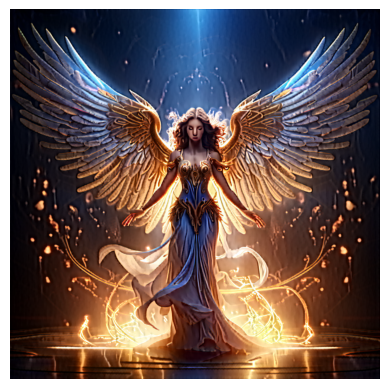

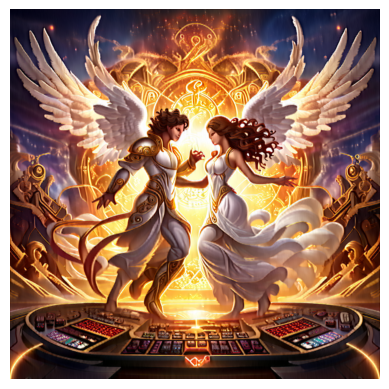

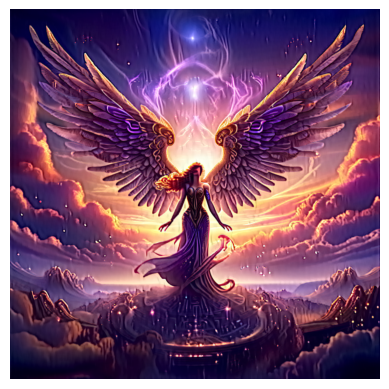

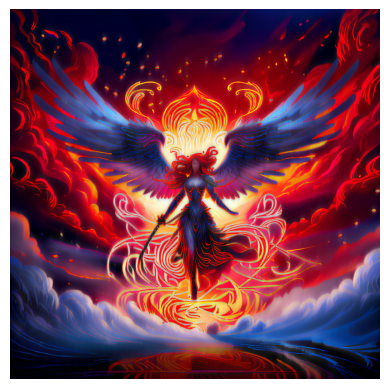

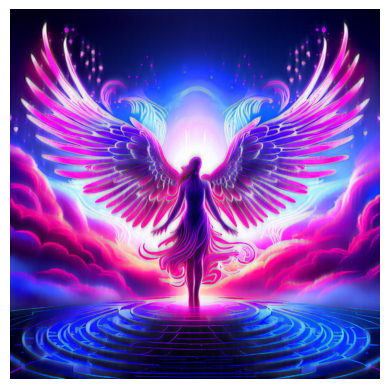

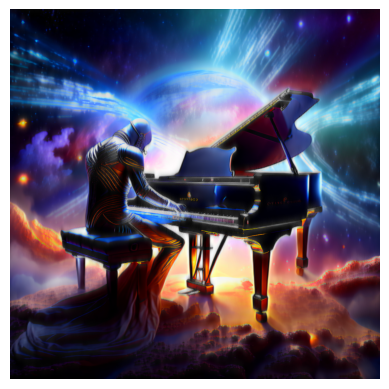

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

result = {}
for music in input_list:
  result[music] = os.listdir(DATA_PATH + '.tmp/style_transfer/'+music)

for (music, pics) in zip(result.keys(), result.values()):
  print(music)
  for pic in pics:
    if pic.endswith('.png'):
      image = Image.open((DATA_PATH + '.tmp/style_transfer/'+music+'/'+pic))
      plt.imshow(image)
      plt.axis('off')
      plt.show()